In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the datsets
match_df = pd.read_csv("matches.csv")
delivery_df = pd.read_csv("deliveries.csv")

In [3]:
print(match_df.shape)
delivery_df.shape

(756, 18)


(179078, 21)

In [4]:
# match dataframe
match_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [5]:
# delivery dataframe
delivery_df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
# Checking the runs c=scored in bth the innnings of each match an storing it in another dataframe
total_score_df = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [7]:
# we just need the first inning total for our calculation
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [8]:
merge = match_df.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on= 'match_id')
merge

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [9]:
merge['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
# Name of the teams for the datasets that are playing till today
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [11]:
# Changing the name of the playing teams to their current names
merge['team1'] = merge['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge['team2'] = merge['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

merge['team1'] = merge['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge['team2'] = merge['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge['team1'] = merge['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge['team2'] = merge['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [12]:
# We only need the teams that are playing till current date, so we are dropping others
merge = merge[merge['team1'].isin(teams)]
merge = merge[merge['team2'].isin(teams)]

In [13]:
# Matches that are affected by DLS method
merge['dl_applied'].value_counts()

dl_applied
0    626
1     15
Name: count, dtype: int64

In [14]:
# We are keeping only those matches that are not affected by DLS
merge = merge[merge['dl_applied'] == 0]
merge

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [15]:
merge = merge[['match_id', 'city', 'winner', 'total_runs']]
merge_df = merge.merge(delivery_df, on = 'match_id')

In [16]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [17]:
merge_df = merge_df[merge_df['inning'] == 2]

In [18]:
# Checking for Null Values in the merge dataset
merge_df.isnull().sum()

match_id                0
city                  832
winner                 27
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed    68860
dismissal_kind      68860
fielder             69855
dtype: int64

In [19]:
# Filling the missing values in the city column with the moe of their records and the winner column with No result
merge_df = merge_df.assign(
    city = merge_df['city'].fillna(merge_df['city'].mode()[0]),
    winner = merge_df['winner'].fillna('No Result')
)

In [20]:
# Check Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers' 'No Result'
 'Delhi Capitals']
['Royal Challengers Bangalore' 'Delhi Daredevils' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings' 'Deccan Chargers'
 'Delhi Capitals']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Delhi Capitals']


In [21]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['winner'] = merge_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge_df['batting_team'] = merge_df['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['winner'] = merge_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [22]:
# Check Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Chennai Super Kings' 'Rajasthan Royals' 'No Result']
['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals']


In [23]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge_df['winner'] = merge_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [24]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [25]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
merge_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [26]:
merge_df['batting_team'] = merge_df['batting_team'].str.strip()

In [27]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [28]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Punjab Kings' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [29]:
# We take the help of cumulative sum to calculate the total runs ball by ball
merge_df['current_score'] = merge_df.groupby(['match_id'])['total_runs_y'].cumsum()

In [30]:
merge_df['runs_left'] = (merge_df['total_runs_x'] - merge_df['current_score']) + 1

In [31]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [32]:
merge_df['balls_left'] = 126 - (merge_df['over']*6 + merge_df['ball'])

In [33]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [34]:
merge_df['player_dismissed'] = merge_df['player_dismissed'].fillna("0")
merge_df['player_dismissed'] = merge_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
merge_df['player_dismissed'] = merge_df['player_dismissed'].astype('int')
wickets = merge_df.groupby('match_id')['player_dismissed'].cumsum()
merge_df['wickets'] = 10 - wickets
merge_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [35]:
# CRR
merge_df['crr'] = (merge_df['current_score']*6)/(120 - merge_df['balls_left'])

In [36]:
#Required runrate
merge_df['rrr'] = (merge_df['runs_left']*6)/merge_df['balls_left']

In [37]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000


In [38]:
#Result declare in form of 0 & 1
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [39]:
# Deleting the unnecessary columns
merge_df  = merge_df.drop(columns = [ 'dismissal_kind', 'fielder'])

In [40]:
merge_df['result'] = merge_df.apply(result,axis=1)
print(merge_df.isnull().sum())

match_id            0
city                0
winner              0
total_runs_x        0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs_y        0
player_dismissed    0
current_score       0
runs_left           0
balls_left          0
wickets             0
crr                 0
rrr                 5
result              0
dtype: int64


In [41]:
# Checking the first 2 rows
print(merge_df.head(2))

     match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   

           batsman  ... extra_runs total_runs_y  player_dismissed  \
125       CH Gayle  ...          0            1                 0   
126  Mandeep Singh  ...          0            0                 0   

     current_score  runs_left  balls_left  wickets  crr        rrr  result  
125              1        207         119       10  6.0  10.436975       0  
126              1        207         118       10  3.0  10.525424       0  

[2 rows x 29 columns]


In [42]:
# Saving the cleaned datset into a new dataset
merge_df.to_csv('final_dataset.csv', index=False)

In [43]:
final_df=merge_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,152,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,152,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,152,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,152,7.915966,-24.000000,0


In [44]:
final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
27707,Punjab Kings,Sunrisers Hyderabad,Kimberley,0,1,3,168,8.521008,0.000000,1
99961,Punjab Kings,Kolkata Knight Riders,Kolkata,72,31,4,163,6.202247,13.935484,0
11534,Kolkata Knight Riders,Rajasthan Royals,Jaipur,58,22,5,196,8.510204,15.818182,0
2560,Punjab Kings,Sunrisers Hyderabad,Hyderabad,144,105,9,159,6.400000,8.228571,0
108687,Punjab Kings,Mumbai Indians,Chandigarh,100,60,8,172,7.300000,10.000000,0
...,...,...,...,...,...,...,...,...,...,...
124311,Delhi Capitals,Kolkata Knight Riders,Kolkata,160,92,8,206,10.071429,10.434783,0
14053,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,33,45,10,140,8.640000,4.400000,1
101130,Delhi Capitals,Chennai Super Kings,Chennai,107,81,7,150,6.769231,7.925926,0
119718,Sunrisers Hyderabad,Punjab Kings,Chandigarh,106,67,9,179,8.377358,9.492537,1


In [45]:
final_df['batting_team'].unique()

array(['Punjab Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

In [46]:
final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')

In [47]:
final_df['bowling_team'].unique()

array(['Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [48]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
15432,Delhi Capitals,Kolkata Knight Riders,Kolkata,96,81,6,133,5.846154,7.111111,0


#EDA

In [49]:
final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
final_df['batting_team'].unique()

array(['Punjab Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Mumbai Indians', 'Rajasthan Royals', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

In [50]:
final_df['bowling_team'].unique()

array(['Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

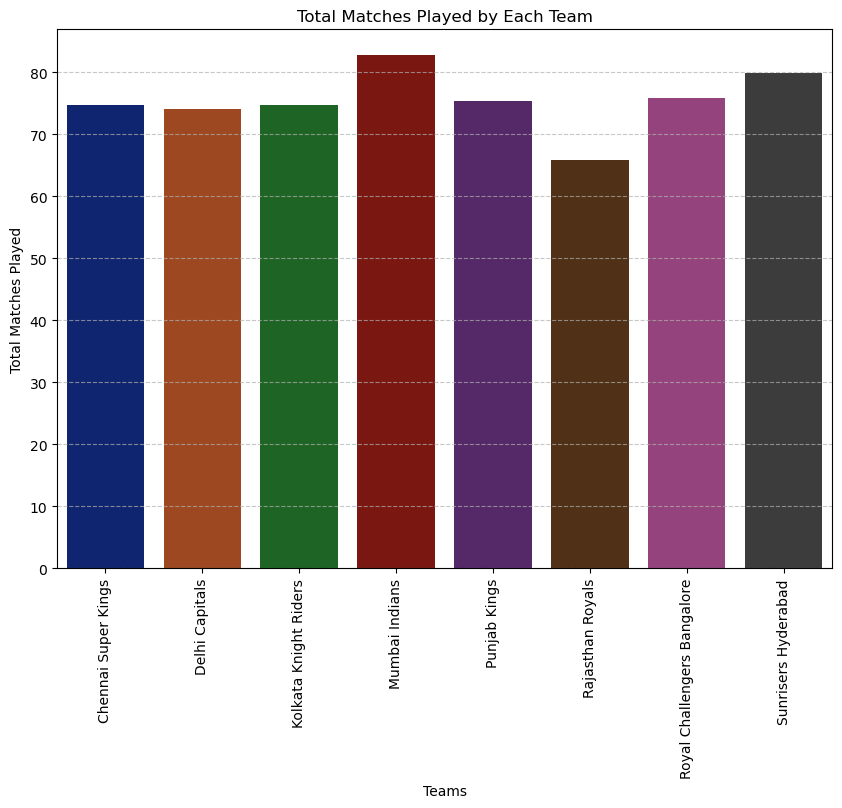

In [51]:
# Total Matches Played by Each Team
# We are using matplotlib and seaborn library for data visualization with different graphs and charts
team_matches = final_df['batting_team'].value_counts() + final_df['bowling_team'].value_counts()
plt.figure(figsize = (10,7))
sns.barplot(x = team_matches.index, y = team_matches.values/240,hue=team_matches.index, palette = 'dark')
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Total Matches Played")
plt.title("Total Matches Played by Each Team")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

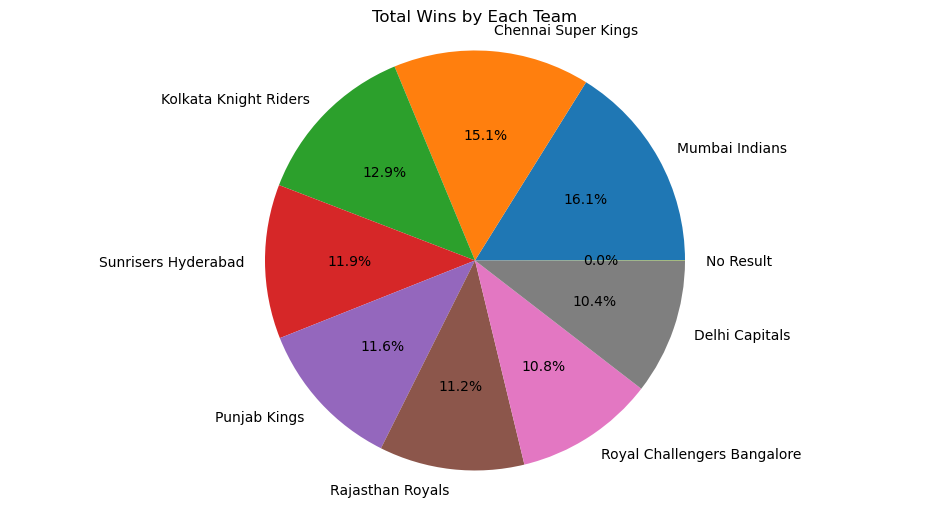

In [52]:
# Total number of wins by each team
winner_counts = merge_df['winner'].value_counts()
plt.figure(figsize = (12,6))
plt.pie(winner_counts, labels = winner_counts.index, autopct='%1.1f%%')
plt.title("Total Wins by Each Team")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

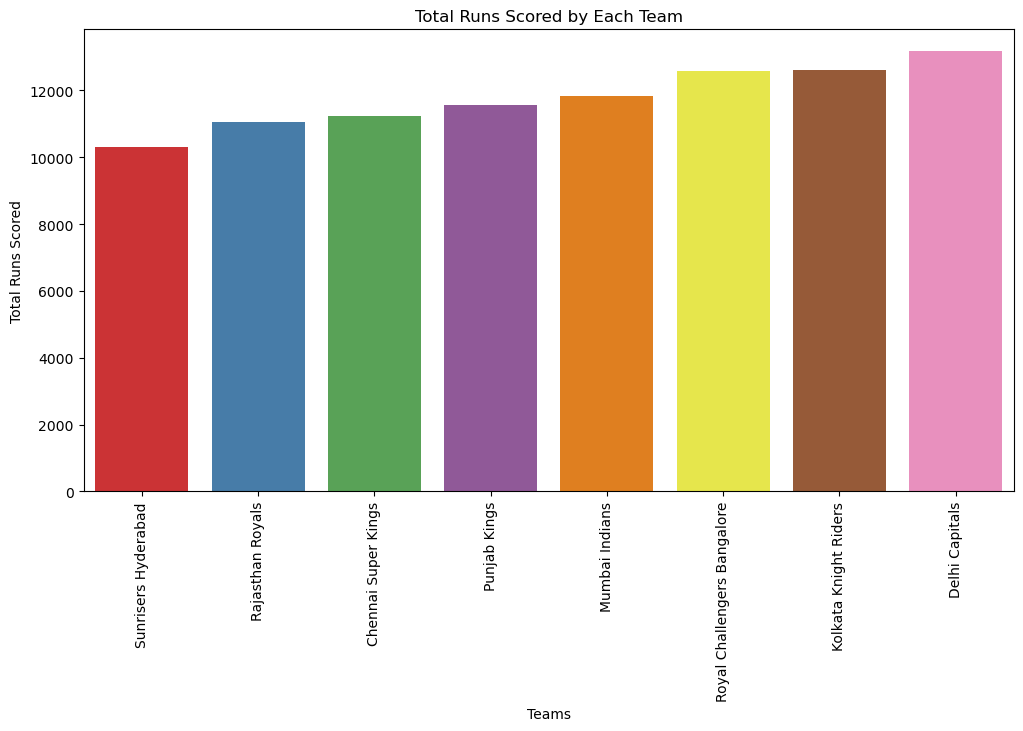

In [53]:
# Total runs scored by each team
team_total_runs = merge_df.groupby('batting_team')['total_runs_y'].sum().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x = team_total_runs.index, y = team_total_runs.values,hue=team_total_runs.index, palette = 'Set1',legend=False)
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored by Each Team")
plt.show()

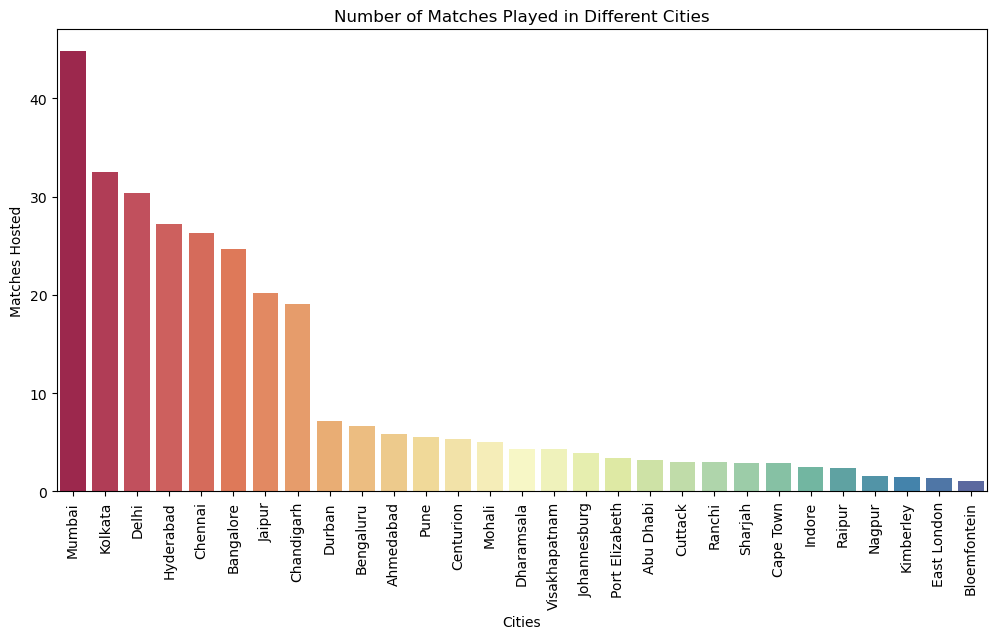

In [54]:
# Matches played in different cities
city_matches = merge_df['city'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = city_matches.index, y=city_matches.values/240,hue=city_matches.index, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Matches Hosted")
plt.title("Number of Matches Played in Different Cities")
plt.show()

# Data Preprocessing

In [55]:
final_df.dropna(inplace=True)

In [56]:
final_df = final_df[final_df['balls_left'] != 0]

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target
X = final_df.drop('result', axis=1)
y = final_df['result']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
categorical_features = ['batting_team', 'bowling_team', 'city']
numeric_features = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']


In [58]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
85800,Mumbai Indians,Chennai Super Kings,Delhi,92,50,7,192,8.657143,11.040000
137186,Sunrisers Hyderabad,Rajasthan Royals,Hyderabad,8,11,5,203,10.788991,4.363636
13792,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,95,84,8,129,5.833333,6.785714
115907,Kolkata Knight Riders,Punjab Kings,Chandigarh,29,42,8,138,8.461538,4.142857
96856,Rajasthan Royals,Mumbai Indians,Ahmedabad,121,76,7,178,7.909091,9.552632
...,...,...,...,...,...,...,...,...,...
101370,Punjab Kings,Rajasthan Royals,Pune,124,95,8,162,9.360000,7.831579
8900,Mumbai Indians,Chennai Super Kings,Chennai,47,19,4,208,9.623762,14.842105
35202,Kolkata Knight Riders,Chennai Super Kings,Kolkata,136,94,8,164,6.692308,8.680851
76129,Mumbai Indians,Rajasthan Royals,Jaipur,154,78,7,179,3.714286,11.846154


In [59]:
from sklearn.compose import ColumnTransformer
# Column transformer to handle categorical and 
# numerical features differently before feeding them into a model.
preprocessor = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])


# Model Training 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Logistic Regression

In [61]:
# Create a pipeline with logistic regression
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Logistic Regression Accuracy: 0.800692760651195
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6888
           1       0.80      0.82      0.81      7547

    accuracy                           0.80     14435
   macro avg       0.80      0.80      0.80     14435
weighted avg       0.80      0.80      0.80     14435

Confusion Matrix:
 [[5380 1508]
 [1369 6178]]


#Random Forest Classifier


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
   # Assuming 'trf' is your ColumnTransformer defined earlier
trf = ColumnTransformer([
       ('trf', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
       ('scaler', StandardScaler(), numeric_features)
])
rf_pipe = Pipeline(steps=[
       ('step1', trf), 
       ('step2', RandomForestClassifier())
])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('trf',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city']),
                                                 ('scaler', StandardScaler(),
                                                  ['runs_left', 'balls_left',
                                                   'wickets', 'total_runs_x',
                                                   'crr', 'rrr'])])),
                ('step2', RandomForestClassifier())])

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.800692760651195

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      6888
           1       0.80      0.82      0.81      7547

    accuracy                           0.80     14435
   macro avg       0.80      0.80      0.80     14435
weighted avg       0.80      0.80      0.80     14435



#XGBoost Classifier(Extreme Gradient Boosting)

In [65]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[
    ('step1', trf), 
    ('step2', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_test)

c:\Users\ruthw\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:15:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost Accuracy: 0.9976446137859369

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6888
           1       1.00      1.00      1.00      7547

    accuracy                           1.00     14435
   macro avg       1.00      1.00      1.00     14435
weighted avg       1.00      1.00      1.00     14435


Confusion Matrix:
 [[6873   15]
 [  19 7528]]


Performance Evaluation

In [67]:
rf_pipe.predict_proba(X_test)[10]

array([0.07, 0.93])

In [68]:
import pickle
pickle.dump(rf_pipe,open('pickl.pkl','wb'))

#This line is serializing (saving) your trained
#  machine learning pipeline (svc_pipe) to a file called pickl.pkl,
#  so you can use it later without retraining.